In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.utils import resample

from imblearn.over_sampling import RandomOverSampler

In [2]:
pd.set_option('display.max_columns', None)

# _________________________________
# CARGAS DE TABLAS

In [3]:
tabla_principal =  pd.read_csv("C:/Users/Javi/Documents/bootcamp/proyectos/machine_learning/academic_performance_analytics_complete.csv", sep=',')
tabla_principal

,Timestamp,Student_ID,Age,Gender,Ethnicity,SES,Location,Enrollment_Status,GPA,Attendance_Rate,Study_Hours_per_Week,Extracurricular_Participation,Course_Load,Major_Field_of_Study,Previous_Academic_Performance,Course_Type,Course_Difficulty,Instructor_Rating,Class_Size,Sentiment_Score,Feedback_Length,Access_to_Learning_Materials,Internet_Accessibility,Counseling_Sessions_Attended,Tutoring_Hours,Assignment_Scores,Midterm_Scores,Final_Exam_Scores,Learning_Style_Compatibility,Career_Alignment_Indicator,Library_Usage_Frequency,Study_Group_Participation,Resource_Access_Score,Learning_Material_Satisfaction,Peer_Interaction_Score,Academic_Support_Utilization,Stress_Indicator_Score,Assignment_Completion_Rate,Learning_Satisfaction_Level,Academic_Performance_Category,Sentiment_Classification,Requirement_Fulfillment_Status,Course_Satisfaction_Level,Engagement_Level
0,2018-07-14 06:00:00,1678,25,0,White,Low,"Texas, Dallas",0,2.283531,0.9,17.647264,0,6,Arts,60.237666,Core,Hard,3.776889,30,0.733300,484,0,1,1,0.000000,83.235872,56.684179,74.283938,0,1,3,0,0.696702,1,0.341722,0,0.346726,0.7,Medium,High,Neutral,Partially Met,Neutral,Active
1,2018-09-27 03:00:00,3106,19,1,White,Low,"Texas, Dallas",0,2.787184,0.6,7.304669,0,5,Engineering,71.919002,Core,Hard,3.708644,30,0.179273,450,0,0,0,0.515937,70.477437,63.487994,69.581913,0,1,3,1,0.655516,0,0.665257,0,0.957973,0.8,Medium,Medium,Negative,Partially Met,Neutral,Active
2,2022-04-25 00:00:00,4350,22,1,African American,Low,"Texas, Dallas",0,2.689566,0.8,12.816062,1,5,Engineering,79.622769,Elective,Easy,4.453540,30,0.357695,496,0,0,0,5.293700,78.254544,81.371728,71.698227,0,0,1,0,0.666346,1,0.501590,0,0.431574,0.7,Low,Medium,Neutral,Fully Met,Satisfied,Moderate
3,2024-02-24 10:00:00,2890,20,0,White,Medium,"Texas, Dallas",0,2.486635,0.6,19.797873,1,4,Arts,82.419630,Elective,Moderate,3.558563,30,0.532631,162,0,0,0,0.000000,90.783972,66.462219,70.034328,1,0,0,0,0.646857,0,0.665658,0,0.633358,0.8,High,High,Neutral,Partially Met,Unsatisfied,Active
4,2020-10-09 23:00:00,4019,25,1,White,Medium,"Texas, Dallas",0,3.258069,1.0,14.457067,0,5,Engineering,69.389492,Advanced,Easy,2.715564,30,0.714675,234,1,1,0,0.830865,65.559076,92.394189,55.446190,0,1,0,0,0.546623,0,0.555273,0,0.581689,0.8,Medium,Medium,Positive,Partially Met,Neutral,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61340,2019-10-29 18:00:00,3885,26,1,White,Low,"Texas, Dallas",0,2.149150,0.7,24.606399,0,4,Arts,78.469013,Elective,Moderate,3.320002,10,0.571314,210,0,0,0,0.000000,79.638439,48.430788,80.654766,0,1,0,1,0.678753,1,0.481441,0,0.627292,0.9,High,Low,Positive,Fully Met,Satisfied,Moderate
61341,2020-09-11 18:00:00,2972,29,1,White,High,"Texas, Dallas",1,2.452148,0.9,13.969722,0,5,Arts,75.114187,Elective,Moderate,4.084590,10,0.491516,101,0,0,0,2.968496,71.845174,70.337474,84.596145,0,1,3,0,0.553857,1,0.621769,0,0.990375,0.8,Medium,High,Neutral,Partially Met,Neutral,Active
61342,2018-11-14 12:00:00,3397,19,1,White,Low,"Texas, Dallas",1,2.372740,0.9,19.750728,0,4,Science,67.443383,Elective,Hard,3.832986,30,0.454625,158,0,0,0,0.000000,69.577117,69.073187,59.010887,0,0,3,0,0.632214,0,0.498190,0,0.469423,0.8,High,Medium,Positive,Partially Met,Satisfied,Active
61343,2023-03-15 22:00:00,4617,25,0,White,High,"Texas, Dallas",0,2.654484,0.8,15.507835,0,4,Law,67.280996,Core,Hard,3.144849,20,0.650554,495,0,0,2,0.872598,65.974002,57.328627,72.791444,1,0,5,1,0.824990,0,0.420456,1,0.633345,0.9,High,Medium,Neutral,Partially Met,Satisfied,Inactive


# _________________________________
# TIPOS DE DATOS

In [4]:
# Tipos de datos de las columnas de tabla1
print("Tipos de datos de tabla1:")
print(tabla_principal.dtypes)





Tipos de datos de tabla1:
Timestamp                          object
Student_ID                          int64
Age                                 int64
Gender                              int64
Ethnicity                          object
SES                                object
Location                           object
Enrollment_Status                   int64
GPA                               float64
Attendance_Rate                   float64
Study_Hours_per_Week              float64
Extracurricular_Participation       int64
Course_Load                         int64
Major_Field_of_Study               object
Previous_Academic_Performance     float64
Course_Type                        object
Course_Difficulty                  object
Instructor_Rating                 float64
Class_Size                          int64
Sentiment_Score                   float64
Feedback_Length                     int64
Access_to_Learning_Materials        int64
Internet_Accessibility              int64
Counseli

# VISUALIZACION PRE-PREPARACION

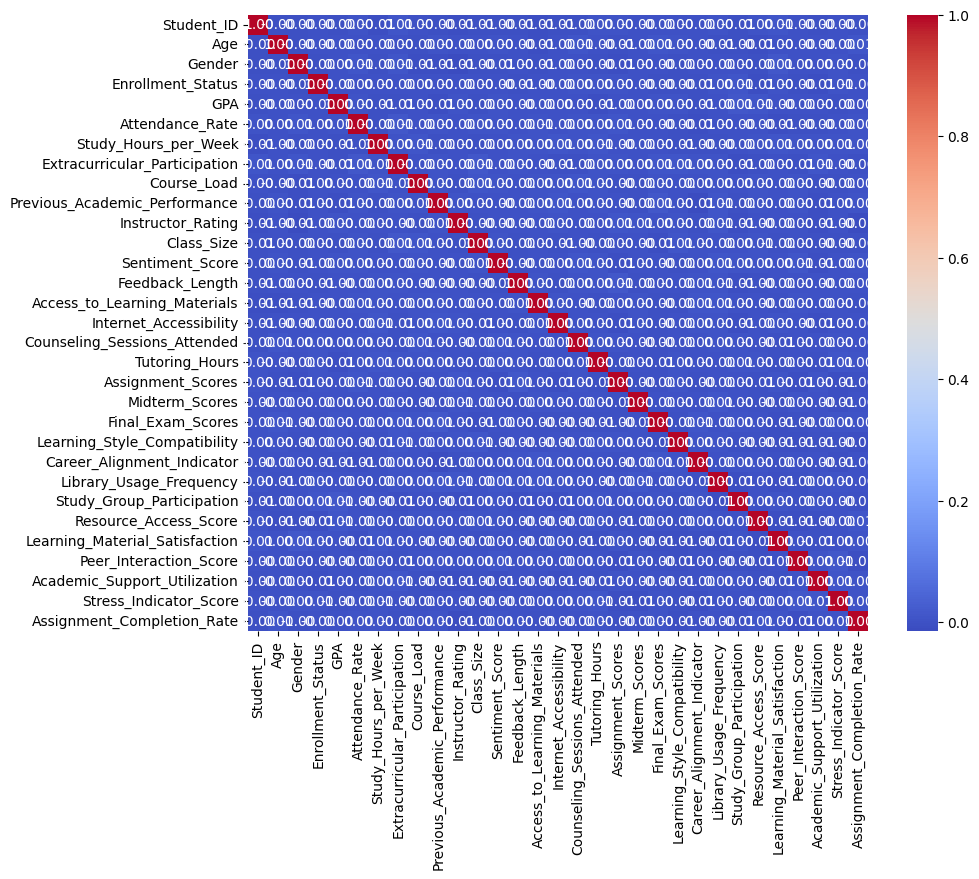

In [5]:

# Suponiendo que ya tienes un DataFrame llamado tabla2
# tabla2 = pd.read_csv('ruta/a/tu/archivo.csv')  # Si necesitas cargar los datos desde un archivo
# Seleccionar solo las columnas numéricas
tabla_principal_numerica = tabla_principal.select_dtypes(include=['number'])
# Obtener la matriz de correlación
matriz_correlacion = tabla_principal_numerica.corr()
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))
# Dibujar el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')
# Mostrar el gráfico
plt.show()

# _________________________________
# PREPARAR TABLA 

In [6]:
tabla_principal.head(1)


,Timestamp,Student_ID,Age,Gender,Ethnicity,SES,Location,Enrollment_Status,GPA,Attendance_Rate,Study_Hours_per_Week,Extracurricular_Participation,Course_Load,Major_Field_of_Study,Previous_Academic_Performance,Course_Type,Course_Difficulty,Instructor_Rating,Class_Size,Sentiment_Score,Feedback_Length,Access_to_Learning_Materials,Internet_Accessibility,Counseling_Sessions_Attended,Tutoring_Hours,Assignment_Scores,Midterm_Scores,Final_Exam_Scores,Learning_Style_Compatibility,Career_Alignment_Indicator,Library_Usage_Frequency,Study_Group_Participation,Resource_Access_Score,Learning_Material_Satisfaction,Peer_Interaction_Score,Academic_Support_Utilization,Stress_Indicator_Score,Assignment_Completion_Rate,Learning_Satisfaction_Level,Academic_Performance_Category,Sentiment_Classification,Requirement_Fulfillment_Status,Course_Satisfaction_Level,Engagement_Level
0,2018-07-14 06:00:00,1678,25,0,White,Low,"Texas, Dallas",0,2.283531,0.9,17.647264,0,6,Arts,60.237666,Core,Hard,3.776889,30,0.7333,484,0,1,1,0.0,83.235872,56.684179,74.283938,0,1,3,0,0.696702,1,0.341722,0,0.346726,0.7,Medium,High,Neutral,Partially Met,Neutral,Active


In [7]:
tabla1 = tabla_principal[["Age", "Gender", "Ethnicity", "SES", "Internet_Accessibility", "Attendance_Rate", "Study_Hours_per_Week", "Extracurricular_Participation", "Study_Group_Participation", "Access_to_Learning_Materials", "Academic_Support_Utilization", "Course_Difficulty", "Assignment_Scores", "Midterm_Scores", "Final_Exam_Scores", "GPA"]]
tabla1

,Age,Gender,Ethnicity,SES,Internet_Accessibility,Attendance_Rate,Study_Hours_per_Week,Extracurricular_Participation,Study_Group_Participation,Access_to_Learning_Materials,Academic_Support_Utilization,Course_Difficulty,Assignment_Scores,Midterm_Scores,Final_Exam_Scores,GPA
0,25,0,White,Low,1,0.9,17.647264,0,0,0,0,Hard,83.235872,56.684179,74.283938,2.283531
1,19,1,White,Low,0,0.6,7.304669,0,1,0,0,Hard,70.477437,63.487994,69.581913,2.787184
2,22,1,African American,Low,0,0.8,12.816062,1,0,0,0,Easy,78.254544,81.371728,71.698227,2.689566
3,20,0,White,Medium,0,0.6,19.797873,1,0,0,0,Moderate,90.783972,66.462219,70.034328,2.486635
4,25,1,White,Medium,1,1.0,14.457067,0,0,1,0,Easy,65.559076,92.394189,55.446190,3.258069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61340,26,1,White,Low,0,0.7,24.606399,0,1,0,0,Moderate,79.638439,48.430788,80.654766,2.149150
61341,29,1,White,High,0,0.9,13.969722,0,0,0,0,Moderate,71.845174,70.337474,84.596145,2.452148
61342,19,1,White,Low,0,0.9,19.750728,0,0,0,0,Hard,69.577117,69.073187,59.010887,2.372740
61343,25,0,White,High,0,0.8,15.507835,0,1,0,1,Hard,65.974002,57.328627,72.791444,2.654484


In [8]:
tabla1.dtypes

Age                                int64
Gender                             int64
Ethnicity                         object
SES                               object
Internet_Accessibility             int64
Attendance_Rate                  float64
Study_Hours_per_Week             float64
Extracurricular_Participation      int64
Study_Group_Participation          int64
Access_to_Learning_Materials       int64
Academic_Support_Utilization       int64
Course_Difficulty                 object
Assignment_Scores                float64
Midterm_Scores                   float64
Final_Exam_Scores                float64
GPA                              float64
dtype: object

In [9]:
non_numeric_columns = tabla1.select_dtypes(include=['object']).columns
numeric_columns = tabla1.select_dtypes(include=['int64']).columns

In [10]:

tabla1 = pd.get_dummies(tabla1, columns=non_numeric_columns)

In [11]:
tabla1.columns = tabla1.columns.str.lower()


In [12]:
tabla1.dtypes

age                                int64
gender                             int64
internet_accessibility             int64
attendance_rate                  float64
study_hours_per_week             float64
extracurricular_participation      int64
study_group_participation          int64
access_to_learning_materials       int64
academic_support_utilization       int64
assignment_scores                float64
midterm_scores                   float64
final_exam_scores                float64
gpa                              float64
ethnicity_african american          bool
ethnicity_asian                     bool
ethnicity_hispanic                  bool
ethnicity_other                     bool
ethnicity_white                     bool
ses_high                            bool
ses_low                             bool
ses_medium                          bool
course_difficulty_easy              bool
course_difficulty_hard              bool
course_difficulty_moderate          bool
dtype: object

In [13]:
# Cambiar el tipo de dato de las columnas int64 a int16
int_columns = tabla1.select_dtypes(include='int64').columns
tabla1[int_columns] = tabla1[int_columns].astype('int16')
# Verificar los cambios
print(tabla1.dtypes)

age                                int16
gender                             int16
internet_accessibility             int16
attendance_rate                  float64
study_hours_per_week             float64
extracurricular_participation      int16
study_group_participation          int16
access_to_learning_materials       int16
academic_support_utilization       int16
assignment_scores                float64
midterm_scores                   float64
final_exam_scores                float64
gpa                              float64
ethnicity_african american          bool
ethnicity_asian                     bool
ethnicity_hispanic                  bool
ethnicity_other                     bool
ethnicity_white                     bool
ses_high                            bool
ses_low                             bool
ses_medium                          bool
course_difficulty_easy              bool
course_difficulty_hard              bool
course_difficulty_moderate          bool
dtype: object


In [14]:
# Cambiar el tipo de dato de las columnas float64 a float16
float_columns = tabla1.select_dtypes(include='float64').columns
tabla1[float_columns] = tabla1[float_columns].astype('float16')

In [15]:
tabla1.dtypes

age                                int16
gender                             int16
internet_accessibility             int16
attendance_rate                  float16
study_hours_per_week             float16
extracurricular_participation      int16
study_group_participation          int16
access_to_learning_materials       int16
academic_support_utilization       int16
assignment_scores                float16
midterm_scores                   float16
final_exam_scores                float16
gpa                              float16
ethnicity_african american          bool
ethnicity_asian                     bool
ethnicity_hispanic                  bool
ethnicity_other                     bool
ethnicity_white                     bool
ses_high                            bool
ses_low                             bool
ses_medium                          bool
course_difficulty_easy              bool
course_difficulty_hard              bool
course_difficulty_moderate          bool
dtype: object

In [16]:
# Transformar las columnas bool en columnas int16
tabla1 = tabla1.astype({col: 'int16' for col in tabla1.select_dtypes(include='bool').columns})

# Verificar los cambios
print(tabla1.dtypes)

age                                int16
gender                             int16
internet_accessibility             int16
attendance_rate                  float16
study_hours_per_week             float16
extracurricular_participation      int16
study_group_participation          int16
access_to_learning_materials       int16
academic_support_utilization       int16
assignment_scores                float16
midterm_scores                   float16
final_exam_scores                float16
gpa                              float16
ethnicity_african american         int16
ethnicity_asian                    int16
ethnicity_hispanic                 int16
ethnicity_other                    int16
ethnicity_white                    int16
ses_high                           int16
ses_low                            int16
ses_medium                         int16
course_difficulty_easy             int16
course_difficulty_hard             int16
course_difficulty_moderate         int16
dtype: object


In [17]:
# Crear la nueva columna 'extracurricular_participation'
tabla1['extracurricular_participation'] = ((tabla1['extracurricular_participation'] == 1) | 
                                              (tabla1['study_group_participation'] == 1) | 
                                              (tabla1['access_to_learning_materials'] == 1)).astype(int)

# Eliminar las columnas originales
tabla1.drop(columns=['study_group_participation', 'access_to_learning_materials'], inplace=True)

# Reordenar las columnas para colocar 'extracurricular_participation' en la séptima posición
cols = tabla1.columns.tolist()
cols.insert(6, cols.pop(cols.index('extracurricular_participation')))
tabla1 = tabla1[cols]

# Mostrar el resultado
tabla1.head()

C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,age,gender,internet_accessibility,attendance_rate,study_hours_per_week,academic_support_utilization,extracurricular_participation,assignment_scores,midterm_scores,final_exam_scores,gpa,ethnicity_african american,ethnicity_asian,ethnicity_hispanic,ethnicity_other,ethnicity_white,ses_high,ses_low,ses_medium,course_difficulty_easy,course_difficulty_hard,course_difficulty_moderate
0,25,0,1,0.899902,17.640625,0,0,83.2500,56.6875,74.3125,2.283203,0,0,0,0,1,0,1,0,0,1,0
1,19,1,0,0.600098,7.304688,0,1,70.5000,63.5000,69.5625,2.787109,0,0,0,0,1,0,1,0,0,1,0
2,22,1,0,0.799805,12.812500,0,1,78.2500,81.3750,71.6875,2.689453,1,0,0,0,0,0,1,0,1,0,0
3,20,0,0,0.600098,19.796875,0,1,90.8125,66.4375,70.0625,2.486328,0,0,0,0,1,0,0,1,0,0,1
4,25,1,1,1.000000,14.460938,0,1,65.5625,92.3750,55.4375,3.257812,0,0,0,0,1,0,0,1,1,0,0


In [18]:
# Reordenar las columnas
cols = [col for col in tabla1.columns if col not in ['assignment_scores', 'midterm_scores', 'final_exam_scores', 'gpa']]
cols += ['assignment_scores', 'midterm_scores', 'final_exam_scores', 'gpa']
tabla1 = tabla1[cols]

# Mostrar el resultado
tabla1.head()

C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,age,gender,internet_accessibility,attendance_rate,study_hours_per_week,academic_support_utilization,extracurricular_participation,ethnicity_african american,ethnicity_asian,ethnicity_hispanic,ethnicity_other,ethnicity_white,ses_high,ses_low,ses_medium,course_difficulty_easy,course_difficulty_hard,course_difficulty_moderate,assignment_scores,midterm_scores,final_exam_scores,gpa
0,25,0,1,0.899902,17.640625,0,0,0,0,0,0,1,0,1,0,0,1,0,83.2500,56.6875,74.3125,2.283203
1,19,1,0,0.600098,7.304688,0,1,0,0,0,0,1,0,1,0,0,1,0,70.5000,63.5000,69.5625,2.787109
2,22,1,0,0.799805,12.812500,0,1,1,0,0,0,0,0,1,0,1,0,0,78.2500,81.3750,71.6875,2.689453
3,20,0,0,0.600098,19.796875,0,1,0,0,0,0,1,0,0,1,0,0,1,90.8125,66.4375,70.0625,2.486328
4,25,1,1,1.000000,14.460938,0,1,0,0,0,0,1,0,0,1,1,0,0,65.5625,92.3750,55.4375,3.257812


In [19]:
tabla1['aprobado'] = (tabla1['gpa'] >= 2.0).astype(int)
tabla1.head()

C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,age,gender,internet_accessibility,attendance_rate,study_hours_per_week,academic_support_utilization,extracurricular_participation,ethnicity_african american,ethnicity_asian,ethnicity_hispanic,ethnicity_other,ethnicity_white,ses_high,ses_low,ses_medium,course_difficulty_easy,course_difficulty_hard,course_difficulty_moderate,assignment_scores,midterm_scores,final_exam_scores,gpa,aprobado
0,25,0,1,0.899902,17.640625,0,0,0,0,0,0,1,0,1,0,0,1,0,83.2500,56.6875,74.3125,2.283203,1
1,19,1,0,0.600098,7.304688,0,1,0,0,0,0,1,0,1,0,0,1,0,70.5000,63.5000,69.5625,2.787109,1
2,22,1,0,0.799805,12.812500,0,1,1,0,0,0,0,0,1,0,1,0,0,78.2500,81.3750,71.6875,2.689453,1
3,20,0,0,0.600098,19.796875,0,1,0,0,0,0,1,0,0,1,0,0,1,90.8125,66.4375,70.0625,2.486328,1
4,25,1,1,1.000000,14.460938,0,1,0,0,0,0,1,0,0,1,1,0,0,65.5625,92.3750,55.4375,3.257812,1


In [20]:
tabla1 = tabla1.astype(int)
tabla1.head()

,age,gender,internet_accessibility,attendance_rate,study_hours_per_week,academic_support_utilization,extracurricular_participation,ethnicity_african american,ethnicity_asian,ethnicity_hispanic,ethnicity_other,ethnicity_white,ses_high,ses_low,ses_medium,course_difficulty_easy,course_difficulty_hard,course_difficulty_moderate,assignment_scores,midterm_scores,final_exam_scores,gpa,aprobado
0,25,0,1,0,17,0,0,0,0,0,0,1,0,1,0,0,1,0,83,56,74,2,1
1,19,1,0,0,7,0,1,0,0,0,0,1,0,1,0,0,1,0,70,63,69,2,1
2,22,1,0,0,12,0,1,1,0,0,0,0,0,1,0,1,0,0,78,81,71,2,1
3,20,0,0,0,19,0,1,0,0,0,0,1,0,0,1,0,0,1,90,66,70,2,1
4,25,1,1,1,14,0,1,0,0,0,0,1,0,0,1,1,0,0,65,92,55,3,1


# VISUALIZACION POST-PREPARACION

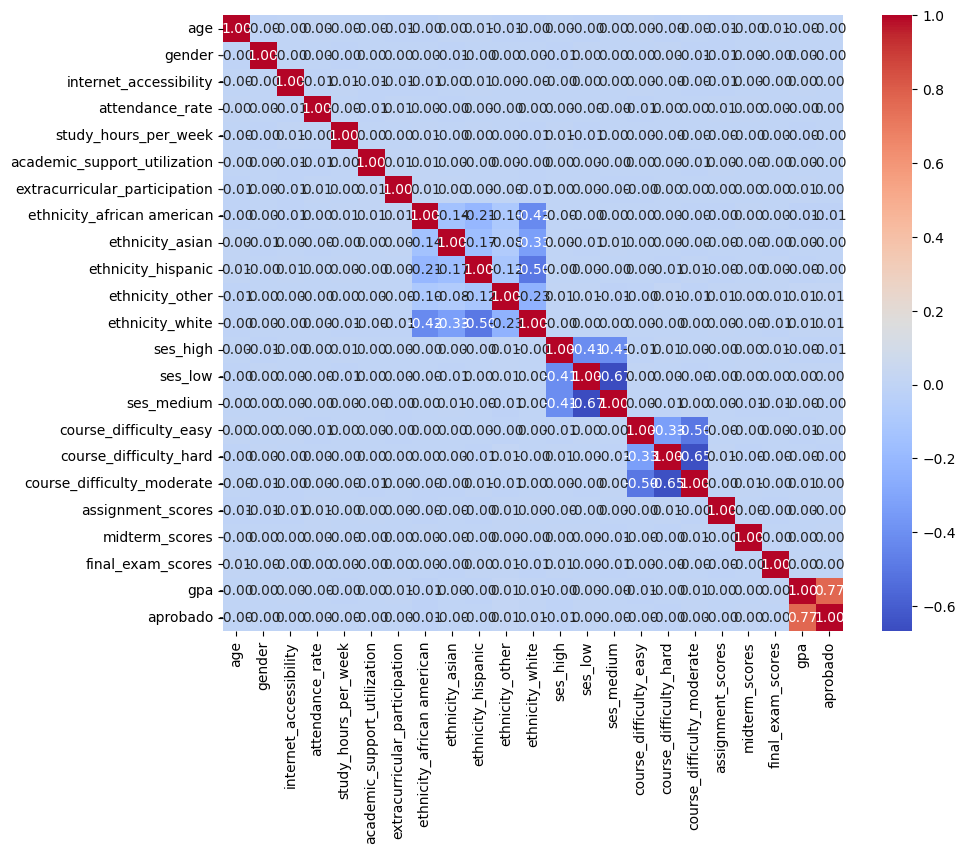

In [21]:

# Suponiendo que ya tienes un DataFrame llamado tabla2
# tabla2 = pd.read_csv('ruta/a/tu/archivo.csv')  # Si necesitas cargar los datos desde un archivo
# Seleccionar solo las columnas numéricas
tabla1_numerica = tabla1.select_dtypes(include=['number'])
# Obtener la matriz de correlación
matriz_correlacion = tabla1_numerica.corr()
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))
# Dibujar el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')
# Mostrar el gráfico
plt.show()

# _________________________________
# TRAIN TEST SPLIT

In [22]:
tabla1.head(1)


,age,gender,internet_accessibility,attendance_rate,study_hours_per_week,academic_support_utilization,extracurricular_participation,ethnicity_african american,ethnicity_asian,ethnicity_hispanic,ethnicity_other,ethnicity_white,ses_high,ses_low,ses_medium,course_difficulty_easy,course_difficulty_hard,course_difficulty_moderate,assignment_scores,midterm_scores,final_exam_scores,gpa,aprobado
0,25,0,1,0,17,0,0,0,0,0,0,1,0,1,0,0,1,0,83,56,74,2,1


In [23]:
features = tabla1.drop(columns = ["aprobado", "gpa"])
target = tabla1["aprobado"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state=42)

# CON NORMALIZER

In [25]:
normalizer = MinMaxScaler()

normalizer.fit(X_train)

MinMaxScaler()

In [26]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [27]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

# _________________________________
# RandomForestClassifier

In [28]:


# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Results:
[[    3  2918]
 [    7 15476]]
              precision    recall  f1-score   support

           0       0.30      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.57      0.50      0.46     18404
weighted avg       0.76      0.84      0.77     18404



# _________________________________
# RandomizedSearchCV

In [29]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)],
        "estimator__max_depth":[int(x) for x in np.linspace(5, 55, num = 5)]}

In [30]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

model = RandomizedSearchCV(estimator = ada_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [31]:
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [5, 17, 30, 42,
                                                                 55],
                                        'estimator__max_leaf_nodes': [50, 112,
                                                                      175, 237,
                                                                      300],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]})

In [32]:
model.best_params_

{'n_estimators': 65,
 'estimator__max_leaf_nodes': 50,
 'estimator__max_depth': 5}

In [33]:
best_model = model.best_estimator_

In [34]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 0.36082941341622715
RMSE 0.15319778569328857
R2 score -0.14733506436880361


# _________________________________
# RandomForestRegressor


In [35]:


# Crear el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: -0.04850124196468819
Mean Squared Error: 0.1400010106498587


# RandomForestClassifier

In [36]:
# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    3  2918]
 [    5 15478]]
              precision    recall  f1-score   support

           0       0.38      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.61      0.50      0.46     18404
weighted avg       0.77      0.84      0.77     18404



#  Gradient Boosting Classifier

In [37]:

# Crear y entrenar el modelo
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_gbc = gbc_model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

[[    1  2920]
 [    4 15479]]
              precision    recall  f1-score   support

           0       0.20      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.52      0.50      0.46     18404
weighted avg       0.74      0.84      0.77     18404



# Logistic Regression

In [38]:

# Create and train the model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predict with the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

[[    0  2921]
 [    0 15483]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

# CON SCALER

In [39]:

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# _________________________________
# RandomForestClassifier

In [40]:


# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Results:
[[    3  2918]
 [    5 15478]]
              precision    recall  f1-score   support

           0       0.38      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.61      0.50      0.46     18404
weighted avg       0.77      0.84      0.77     18404



# _________________________________
# RandomizedSearchCV

In [41]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)],
        "estimator__max_depth":[int(x) for x in np.linspace(5, 55, num = 5)]}

In [42]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

model = RandomizedSearchCV(estimator = ada_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [43]:
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [5, 17, 30, 42,
                                                                 55],
                                        'estimator__max_leaf_nodes': [50, 112,
                                                                      175, 237,
                                                                      300],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]})

In [44]:
model.best_params_

{'n_estimators': 20,
 'estimator__max_leaf_nodes': 50,
 'estimator__max_depth': 5}

In [45]:
best_model = model.best_estimator_

In [46]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 0.33815212962795527
RMSE 0.14538849599525125
R2 score -0.08884941552065051


# _________________________________
# RandomForestRegressor


In [47]:


# Crear el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: -0.04808905701989907
Mean Squared Error: 0.13994597370136927


# RandomForestClassifier

In [48]:
# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    1  2920]
 [    9 15474]]
              precision    recall  f1-score   support

           0       0.10      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.47      0.50      0.46     18404
weighted avg       0.72      0.84      0.77     18404



#  Gradient Boosting Classifier

In [49]:

# Crear y entrenar el modelo
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_gbc = gbc_model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

[[    1  2920]
 [    4 15479]]
              precision    recall  f1-score   support

           0       0.20      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.52      0.50      0.46     18404
weighted avg       0.74      0.84      0.77     18404



# Logistic Regression

In [50]:

# Create and train the model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predict with the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

[[    0  2921]
 [    0 15483]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

# CON ENCODER

In [51]:


# Transformar las columnas categóricas
encoder = OrdinalEncoder()


X_train= encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


# _________________________________
# RandomForestClassifier

In [52]:


# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Results:
[[    3  2918]
 [    7 15476]]
              precision    recall  f1-score   support

           0       0.30      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.57      0.50      0.46     18404
weighted avg       0.76      0.84      0.77     18404



# _________________________________
# RandomizedSearchCV

In [53]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)],
        "estimator__max_depth":[int(x) for x in np.linspace(5, 55, num = 5)]}

In [54]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

model = RandomizedSearchCV(estimator = ada_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [55]:
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [5, 17, 30, 42,
                                                                 55],
                                        'estimator__max_leaf_nodes': [50, 112,
                                                                      175, 237,
                                                                      300],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]})

In [56]:
model.best_params_

{'n_estimators': 200,
 'estimator__max_leaf_nodes': 237,
 'estimator__max_depth': 5}

In [57]:
best_model = model.best_estimator_

In [58]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 0.36454846733930996
RMSE 0.15447816915178375
R2 score -0.1569241640488106


# _________________________________
# RandomForestRegressor


In [59]:


# Crear el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: -0.04850124196468819
Mean Squared Error: 0.1400010106498587


# RandomForestClassifier

In [60]:
# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    2  2919]
 [    5 15478]]
              precision    recall  f1-score   support

           0       0.29      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.56      0.50      0.46     18404
weighted avg       0.75      0.84      0.77     18404



#  Gradient Boosting Classifier

In [61]:

# Crear y entrenar el modelo
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_gbc = gbc_model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

[[    1  2920]
 [    4 15479]]
              precision    recall  f1-score   support

           0       0.20      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.52      0.50      0.46     18404
weighted avg       0.74      0.84      0.77     18404



# Logistic Regression

In [62]:

# Create and train the model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predict with the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

[[    0  2921]
 [    0 15483]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

In [63]:
# Contar los valores nulos de cada columna
null_counts = tabla1.isnull().sum()
print(null_counts)

age                              0
gender                           0
internet_accessibility           0
attendance_rate                  0
study_hours_per_week             0
academic_support_utilization     0
extracurricular_participation    0
ethnicity_african american       0
ethnicity_asian                  0
ethnicity_hispanic               0
ethnicity_other                  0
ethnicity_white                  0
ses_high                         0
ses_low                          0
ses_medium                       0
course_difficulty_easy           0
course_difficulty_hard           0
course_difficulty_moderate       0
assignment_scores                0
midterm_scores                   0
final_exam_scores                0
gpa                              0
aprobado                         0
dtype: int64


# _________________________________
# BALANCEO DE CLASES

In [64]:

# Combina las clases mayoritarias y minoritarias
minority = tabla1[tabla1['aprobado'] == 0]
majority = tabla1[tabla1['aprobado'] == 1]

# Sobremuestrear la clase minoritaria
minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=42)

# Combinar clases mayoritaria y sobremuestreada
balanced_data = pd.concat([majority, minority_oversampled])
print(balanced_data['aprobado'].value_counts())

# Sobremuestreo de la clase minoritaria para balancear
minority = tabla1[tabla1['aprobado'] == 0]
majority = tabla1[tabla1['aprobado'] == 1]
minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=42)
balanced_data = pd.concat([majority, minority_oversampled])


aprobado
1    51709
0    51709
Name: count, dtype: int64


# VISUALIZACION POST-PREPARACION

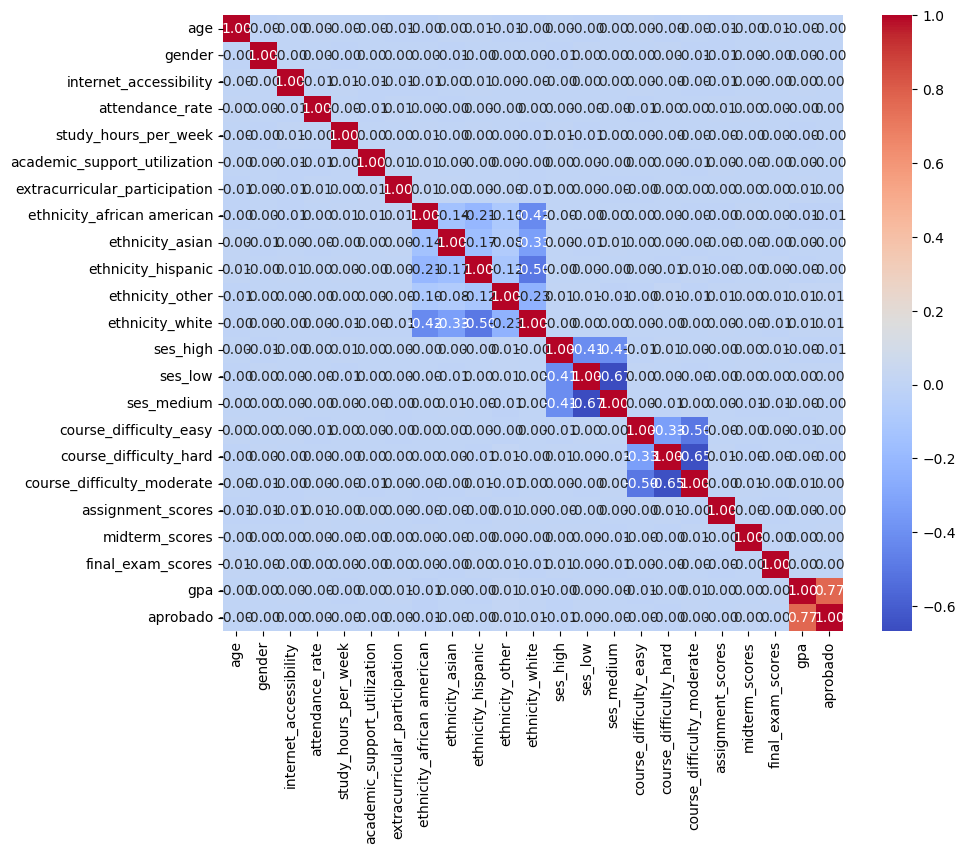

In [65]:

# Suponiendo que ya tienes un DataFrame llamado tabla2
# tabla2 = pd.read_csv('ruta/a/tu/archivo.csv')  # Si necesitas cargar los datos desde un archivo
# Seleccionar solo las columnas numéricas
tabla1_numerica = tabla1.select_dtypes(include=['number'])
# Obtener la matriz de correlación
matriz_correlacion = tabla1_numerica.corr()
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))
# Dibujar el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')
# Mostrar el gráfico
plt.show()

# _________________________________
# TRAIN TEST SPLIT

In [66]:
tabla1.head(1)


,age,gender,internet_accessibility,attendance_rate,study_hours_per_week,academic_support_utilization,extracurricular_participation,ethnicity_african american,ethnicity_asian,ethnicity_hispanic,ethnicity_other,ethnicity_white,ses_high,ses_low,ses_medium,course_difficulty_easy,course_difficulty_hard,course_difficulty_moderate,assignment_scores,midterm_scores,final_exam_scores,gpa,aprobado
0,25,0,1,0,17,0,0,0,0,0,0,1,0,1,0,0,1,0,83,56,74,2,1


In [67]:
features = tabla1.drop(columns = ["aprobado", "gpa"])
target = tabla1["aprobado"]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state=42)

# CON NORMALIZER

In [69]:
normalizer = MinMaxScaler()

normalizer.fit(X_train)

MinMaxScaler()

In [70]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [71]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

# _________________________________
# RandomForestClassifier

In [72]:


# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Results:
[[    3  2918]
 [    7 15476]]
              precision    recall  f1-score   support

           0       0.30      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.57      0.50      0.46     18404
weighted avg       0.76      0.84      0.77     18404



# _________________________________
# RandomizedSearchCV

In [73]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)],
        "estimator__max_depth":[int(x) for x in np.linspace(5, 55, num = 5)]}

In [74]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

model = RandomizedSearchCV(estimator = ada_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [75]:
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [5, 17, 30, 42,
                                                                 55],
                                        'estimator__max_leaf_nodes': [50, 112,
                                                                      175, 237,
                                                                      300],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]})

In [76]:
model.best_params_

{'n_estimators': 200,
 'estimator__max_leaf_nodes': 237,
 'estimator__max_depth': 5}

In [77]:
best_model = model.best_estimator_

In [78]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 0.3822837803965415
RMSE 0.16248844242207408
R2 score -0.21691502721037192


# _________________________________
# RandomForestRegressor


In [79]:


# Crear el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: -0.04850124196468819
Mean Squared Error: 0.1400010106498587


# RandomForestClassifier

In [80]:
# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    1  2920]
 [    5 15478]]
              precision    recall  f1-score   support

           0       0.17      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.50      0.50      0.46     18404
weighted avg       0.73      0.84      0.77     18404



#  Gradient Boosting Classifier

In [81]:

# Crear y entrenar el modelo
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_gbc = gbc_model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

[[    1  2920]
 [    4 15479]]
              precision    recall  f1-score   support

           0       0.20      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.52      0.50      0.46     18404
weighted avg       0.74      0.84      0.77     18404



# Logistic Regression

In [82]:

# Create and train the model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predict with the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

[[    0  2921]
 [    0 15483]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

# CON SCALER

In [83]:

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# _________________________________
# RandomForestClassifier

In [84]:


# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Results:
[[    3  2918]
 [    5 15478]]
              precision    recall  f1-score   support

           0       0.38      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.61      0.50      0.46     18404
weighted avg       0.77      0.84      0.77     18404



# _________________________________
# RandomizedSearchCV

In [85]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)],
        "estimator__max_depth":[int(x) for x in np.linspace(5, 55, num = 5)]}

In [86]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

model = RandomizedSearchCV(estimator = ada_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [87]:
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [5, 17, 30, 42,
                                                                 55],
                                        'estimator__max_leaf_nodes': [50, 112,
                                                                      175, 237,
                                                                      300],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]})

In [88]:
model.best_params_

{'n_estimators': 20,
 'estimator__max_leaf_nodes': 112,
 'estimator__max_depth': 5}

In [89]:
best_model = model.best_estimator_

In [90]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 0.342453467012687
RMSE 0.14676133245689432
R2 score -0.09913091797813744


# _________________________________
# RandomForestRegressor


In [91]:


# Crear el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: -0.04808905701989907
Mean Squared Error: 0.13994597370136927


# RandomForestClassifier

In [92]:
# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    1  2920]
 [    5 15478]]
              precision    recall  f1-score   support

           0       0.17      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.50      0.50      0.46     18404
weighted avg       0.73      0.84      0.77     18404



#  Gradient Boosting Classifier

In [93]:

# Crear y entrenar el modelo
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_gbc = gbc_model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

[[    1  2920]
 [    4 15479]]
              precision    recall  f1-score   support

           0       0.20      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.52      0.50      0.46     18404
weighted avg       0.74      0.84      0.77     18404



# Logistic Regression

In [94]:

# Create and train the model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predict with the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

[[    0  2921]
 [    0 15483]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

# CON ENCODER

In [95]:


# Transformar las columnas categóricas
encoder = OrdinalEncoder()


X_train= encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


# _________________________________
# RandomForestClassifier

In [96]:


# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Results:
[[    3  2918]
 [    7 15476]]
              precision    recall  f1-score   support

           0       0.30      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.57      0.50      0.46     18404
weighted avg       0.76      0.84      0.77     18404



# _________________________________
# RandomizedSearchCV

In [97]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)],
        "estimator__max_depth":[int(x) for x in np.linspace(5, 55, num = 5)]}

In [98]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

model = RandomizedSearchCV(estimator = ada_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [99]:
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [5, 17, 30, 42,
                                                                 55],
                                        'estimator__max_leaf_nodes': [50, 112,
                                                                      175, 237,
                                                                      300],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]})

In [100]:
model.best_params_

{'n_estimators': 20,
 'estimator__max_leaf_nodes': 237,
 'estimator__max_depth': 5}

In [101]:
best_model = model.best_estimator_

In [102]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 0.36613533749720756
RMSE 0.1555060572693447
R2 score -0.16462226539008462


# _________________________________
# RandomForestRegressor


In [103]:


# Crear el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: -0.04850124196468819
Mean Squared Error: 0.1400010106498587


# RandomForestClassifier

In [104]:
# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    2  2919]
 [    3 15480]]
              precision    recall  f1-score   support

           0       0.40      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.62      0.50      0.46     18404
weighted avg       0.77      0.84      0.77     18404



#  Gradient Boosting Classifier

In [105]:

# Crear y entrenar el modelo
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_gbc = gbc_model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

[[    1  2920]
 [    4 15479]]
              precision    recall  f1-score   support

           0       0.20      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.52      0.50      0.46     18404
weighted avg       0.74      0.84      0.77     18404



# Logistic Regression

In [106]:

# Create and train the model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predict with the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

[[    0  2921]
 [    0 15483]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

# CON BALANCEO OVERSAMPLING

In [107]:
# Suponiendo que ya tienes un DataFrame llamado tabla2
# tabla2 = pd.read_csv('ruta/a/tu/archivo.csv')  # Si necesitas cargar los datos desde un archivo
# Crear la nueva columna "GPA_Pass_Fail" basada en GPA
# Balancear las clases usando RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(features, target)
# Añadir la columna balanceada de vuelta al DataFrame
X_resampled['GPA_Pass_Fail'] = y_resampled

# VISUALIZACION CON OVERSAMPLING

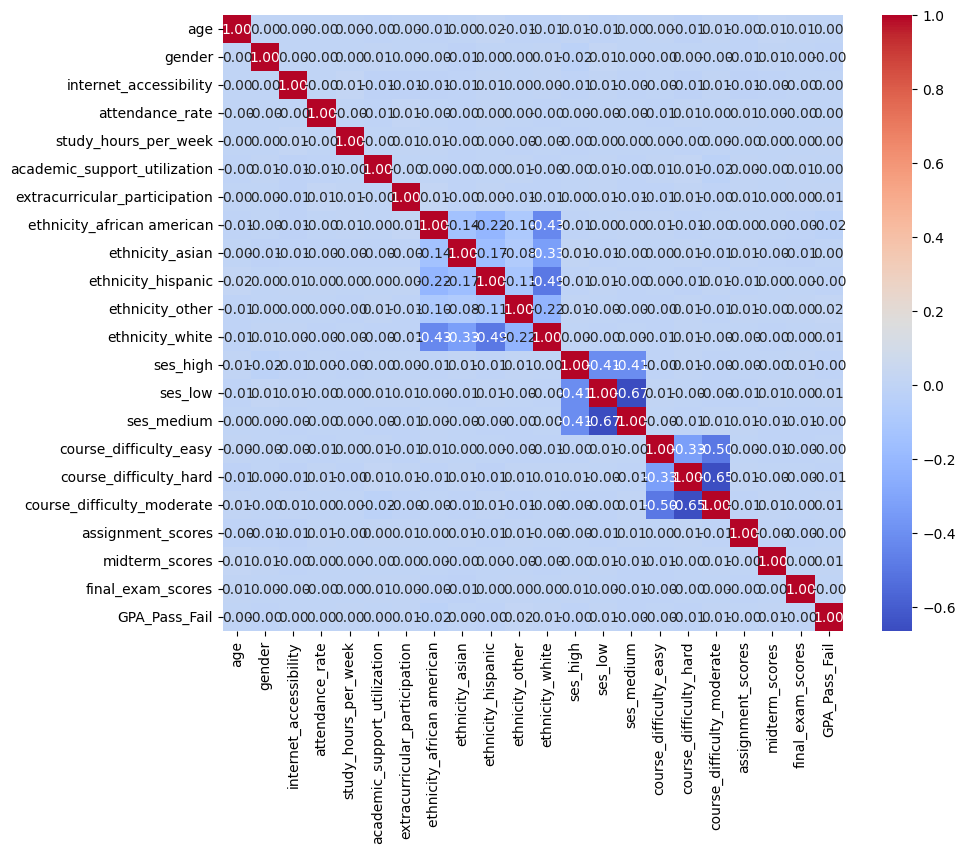

In [108]:

# Suponiendo que ya tienes un DataFrame llamado tabla2
# tabla2 = pd.read_csv('ruta/a/tu/archivo.csv')  # Si necesitas cargar los datos desde un archivo
# Seleccionar solo las columnas numéricas
tabla_X_resampled_numerica = X_resampled.select_dtypes(include=['number'])
# Obtener la matriz de correlación
matriz_correlacion = tabla_X_resampled_numerica.corr()
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))
# Dibujar el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')
# Mostrar el gráfico
plt.show()

# _________________________________
# RandomForestClassifier

In [109]:


# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Results:
[[    3  2918]
 [    7 15476]]
              precision    recall  f1-score   support

           0       0.30      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.57      0.50      0.46     18404
weighted avg       0.76      0.84      0.77     18404



# _________________________________
# RandomizedSearchCV

In [110]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)],
        "estimator__max_depth":[int(x) for x in np.linspace(5, 55, num = 5)]}

In [111]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

model = RandomizedSearchCV(estimator = ada_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [112]:
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [5, 17, 30, 42,
                                                                 55],
                                        'estimator__max_leaf_nodes': [50, 112,
                                                                      175, 237,
                                                                      300],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]})

In [113]:
model.best_params_

{'n_estimators': 20,
 'estimator__max_leaf_nodes': 237,
 'estimator__max_depth': 5}

In [114]:
best_model = model.best_estimator_

In [115]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 0.36719863842639
RMSE 0.15564467179936547
R2 score -0.1656603829451404


# _________________________________
# RandomForestRegressor


In [116]:


# Crear el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: -0.04850124196468819
Mean Squared Error: 0.1400010106498587


# RandomForestClassifier

In [117]:
# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    3  2918]
 [    4 15479]]
              precision    recall  f1-score   support

           0       0.43      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.63      0.50      0.46     18404
weighted avg       0.78      0.84      0.77     18404



#  Gradient Boosting Classifier

In [118]:

# Crear y entrenar el modelo
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_gbc = gbc_model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

[[    1  2920]
 [    4 15479]]
              precision    recall  f1-score   support

           0       0.20      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.52      0.50      0.46     18404
weighted avg       0.74      0.84      0.77     18404



# Logistic Regression

In [119]:

# Create and train the model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predict with the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

[[    0  2921]
 [    0 15483]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2921
           1       0.84      1.00      0.91     15483

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

# SEGUNDO BALANCEO


In [120]:

# Combina las clases mayoritarias y minoritarias
minority = tabla1[tabla1['aprobado'] == 0]
majority = tabla1[tabla1['aprobado'] == 1]

# Sobremuestrear la clase minoritaria
minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=42)

# Combinar clases mayoritaria y sobremuestreada
balanced_data = pd.concat([majority, minority_oversampled])
print(balanced_data['aprobado'].value_counts())

# Sobremuestreo de la clase minoritaria para balancear
minority = tabla1[tabla1['aprobado'] == 0]
majority = tabla1[tabla1['aprobado'] == 1]
minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=42)
balanced_data = pd.concat([majority, minority_oversampled])


aprobado
1    51709
0    51709
Name: count, dtype: int64


# VISUALIZACION POST-PREPARACION

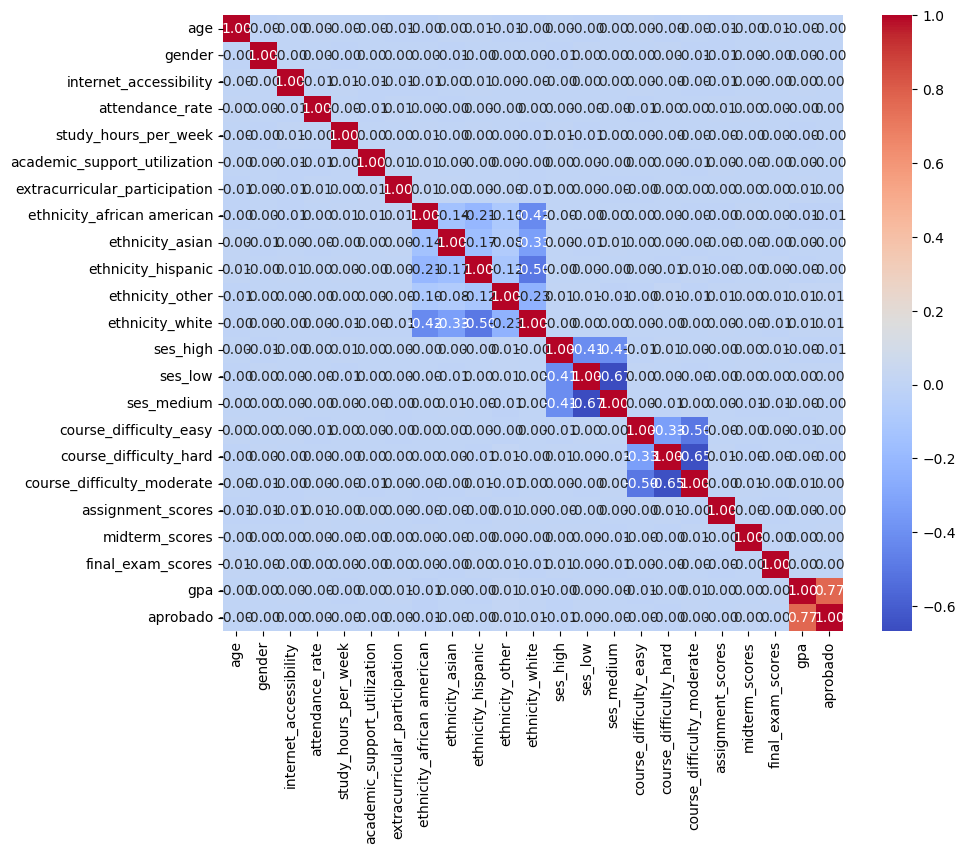

In [121]:

# Suponiendo que ya tienes un DataFrame llamado tabla2
# tabla2 = pd.read_csv('ruta/a/tu/archivo.csv')  # Si necesitas cargar los datos desde un archivo
# Seleccionar solo las columnas numéricas
tabla1_numerica = tabla1.select_dtypes(include=['number'])
# Obtener la matriz de correlación
matriz_correlacion = tabla1_numerica.corr()
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))
# Dibujar el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')
# Mostrar el gráfico
plt.show()

# _________________________________
# TRAIN TEST SPLIT

In [122]:
tabla1.head(1)


,age,gender,internet_accessibility,attendance_rate,study_hours_per_week,academic_support_utilization,extracurricular_participation,ethnicity_african american,ethnicity_asian,ethnicity_hispanic,ethnicity_other,ethnicity_white,ses_high,ses_low,ses_medium,course_difficulty_easy,course_difficulty_hard,course_difficulty_moderate,assignment_scores,midterm_scores,final_exam_scores,gpa,aprobado
0,25,0,1,0,17,0,0,0,0,0,0,1,0,1,0,0,1,0,83,56,74,2,1


In [123]:
features = tabla1.drop(columns = ["aprobado", "gpa"])
target = tabla1["aprobado"]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)


# CON NORMALIZER

In [126]:
normalizer = MinMaxScaler()

normalizer.fit(X_train)

MinMaxScaler()

In [127]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [128]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

# _________________________________
# RandomForestClassifier

In [129]:


# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Results:
[[    1  2890]
 [    9 15504]]
              precision    recall  f1-score   support

           0       0.10      0.00      0.00      2891
           1       0.84      1.00      0.91     15513

    accuracy                           0.84     18404
   macro avg       0.47      0.50      0.46     18404
weighted avg       0.73      0.84      0.77     18404



# _________________________________
# RandomizedSearchCV

In [130]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)],
        "estimator__max_depth":[int(x) for x in np.linspace(5, 55, num = 5)]}

In [131]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

model = RandomizedSearchCV(estimator = ada_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [132]:
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [5, 17, 30, 42,
                                                                 55],
                                        'estimator__max_leaf_nodes': [50, 112,
                                                                      175, 237,
                                                                      300],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]})

In [133]:
model.best_params_

{'n_estimators': 200,
 'estimator__max_leaf_nodes': 112,
 'estimator__max_depth': 5}

In [134]:
best_model = model.best_estimator_

In [135]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 0.337249706795128
RMSE 0.1444488498173061
R2 score -0.09092439416021136


# _________________________________
# RandomForestRegressor


In [136]:


# Crear el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
rf_pred = rf_model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: -0.18841164292351165
Mean Squared Error: 0.15735709628341665


# RandomForestClassifier

In [137]:
# Crear y entrenar el modelo
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
rf_pred = rf_model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    1  2890]
 [    6 15507]]
              precision    recall  f1-score   support

           0       0.14      0.00      0.00      2891
           1       0.84      1.00      0.91     15513

    accuracy                           0.84     18404
   macro avg       0.49      0.50      0.46     18404
weighted avg       0.73      0.84      0.77     18404



#  Gradient Boosting Classifier

In [138]:

# Crear y entrenar el modelo
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_gbc = gbc_model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

[[    0  2891]
 [    0 15513]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2891
           1       0.84      1.00      0.91     15513

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

# Logistic Regression

In [139]:

# Create and train the model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predict with the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

[[    0  2891]
 [    0 15513]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2891
           1       0.84      1.00      0.91     15513

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

# CON SCALER

In [140]:

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# _________________________________
# RandomForestClassifier

In [141]:


# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Results:
[[    1  2890]
 [    9 15504]]
              precision    recall  f1-score   support

           0       0.10      0.00      0.00      2891
           1       0.84      1.00      0.91     15513

    accuracy                           0.84     18404
   macro avg       0.47      0.50      0.46     18404
weighted avg       0.73      0.84      0.77     18404



# _________________________________
# RandomizedSearchCV

In [142]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)],
        "estimator__max_depth":[int(x) for x in np.linspace(5, 55, num = 5)]}

In [143]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

model = RandomizedSearchCV(estimator = ada_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [144]:
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [5, 17, 30, 42,
                                                                 55],
                                        'estimator__max_leaf_nodes': [50, 112,
                                                                      175, 237,
                                                                      300],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]})

In [145]:
model.best_params_

{'n_estimators': 65,
 'estimator__max_leaf_nodes': 50,
 'estimator__max_depth': 5}

In [146]:
best_model = model.best_estimator_

In [147]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 0.3655057026984203
RMSE 0.15458484870417416
R2 score -0.16747473332075424


# _________________________________
# RandomForestRegressor


In [148]:


# Crear el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: -0.05045071627253295
Mean Squared Error: 0.13908974679417518


# RandomForestClassifier

In [149]:
# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    1  2890]
 [   10 15503]]
              precision    recall  f1-score   support

           0       0.09      0.00      0.00      2891
           1       0.84      1.00      0.91     15513

    accuracy                           0.84     18404
   macro avg       0.47      0.50      0.46     18404
weighted avg       0.72      0.84      0.77     18404



#  Gradient Boosting Classifier

In [150]:

# Crear y entrenar el modelo
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_gbc = gbc_model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

[[    0  2891]
 [    0 15513]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2891
           1       0.84      1.00      0.91     15513

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

# Logistic Regression

In [151]:

# Create and train the model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predict with the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

[[    0  2891]
 [    0 15513]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2891
           1       0.84      1.00      0.91     15513

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

# CON ENCODER

In [152]:


# Transformar las columnas categóricas
encoder = OrdinalEncoder()


X_train= encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


# _________________________________
# RandomForestClassifier

In [153]:


# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Results:
[[    1  2890]
 [    9 15504]]
              precision    recall  f1-score   support

           0       0.10      0.00      0.00      2891
           1       0.84      1.00      0.91     15513

    accuracy                           0.84     18404
   macro avg       0.47      0.50      0.46     18404
weighted avg       0.73      0.84      0.77     18404



# _________________________________
# RandomizedSearchCV

In [154]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)],
        "estimator__max_depth":[int(x) for x in np.linspace(5, 55, num = 5)]}

In [155]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

model = RandomizedSearchCV(estimator = ada_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [156]:
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [5, 17, 30, 42,
                                                                 55],
                                        'estimator__max_leaf_nodes': [50, 112,
                                                                      175, 237,
                                                                      300],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]})

In [157]:
model.best_params_

{'n_estimators': 200,
 'estimator__max_leaf_nodes': 237,
 'estimator__max_depth': 5}

In [158]:
best_model = model.best_estimator_

In [159]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 0.36467703394945533
RMSE 0.1542557274401754
R2 score -0.16498910317563942


# _________________________________
# RandomForestRegressor


In [160]:


# Crear el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: -0.0506277469295624
Mean Squared Error: 0.13911318735057596


# RandomForestClassifier

In [161]:
# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    0  2891]
 [    9 15504]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2891
           1       0.84      1.00      0.91     15513

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



#  Gradient Boosting Classifier

In [162]:

# Crear y entrenar el modelo
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_gbc = gbc_model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

[[    0  2891]
 [    0 15513]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2891
           1       0.84      1.00      0.91     15513

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

# Logistic Regression

In [163]:

# Create and train the model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predict with the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

[[    0  2891]
 [    0 15513]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2891
           1       0.84      1.00      0.91     15513

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

# CON OVERSAMPLING

In [164]:
# Suponiendo que ya tienes un DataFrame llamado tabla2
# tabla2 = pd.read_csv('ruta/a/tu/archivo.csv')  # Si necesitas cargar los datos desde un archivo
# Crear la nueva columna "GPA_Pass_Fail" basada en GPA
# Balancear las clases usando RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(features, target)
# Añadir la columna balanceada de vuelta al DataFrame
X_resampled['GPA_Pass_Fail'] = y_resampled

# VISUALIZACION CON OVERSAMPLING

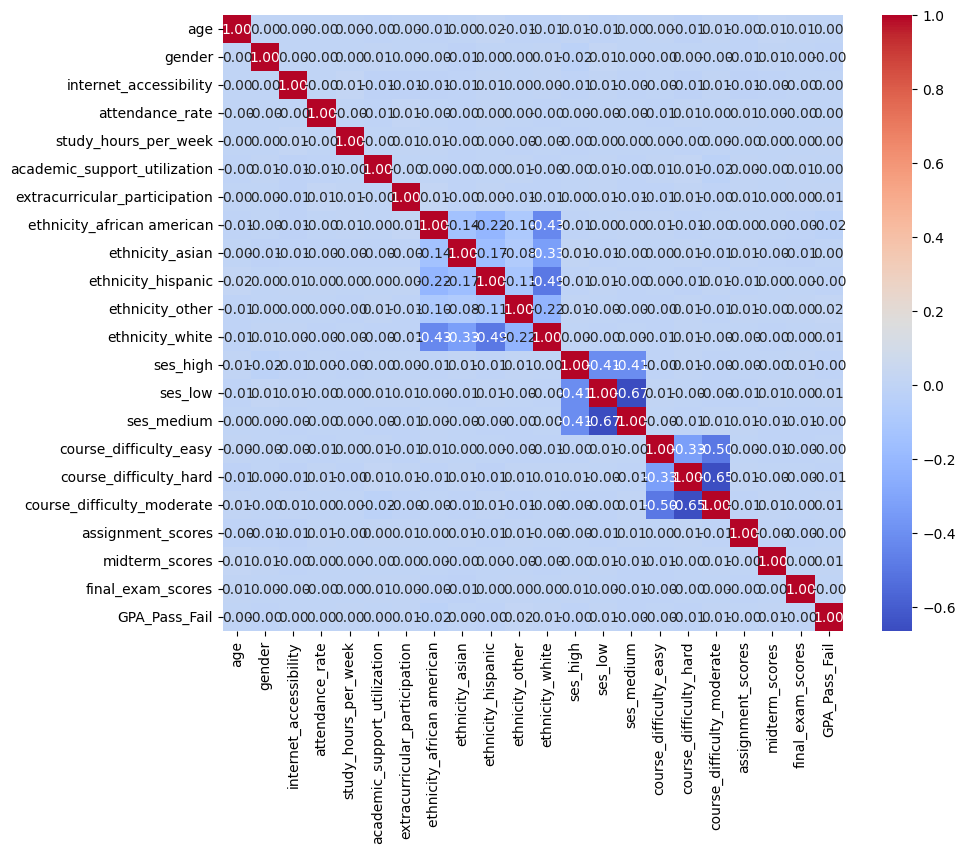

In [165]:

# Suponiendo que ya tienes un DataFrame llamado tabla2
# tabla2 = pd.read_csv('ruta/a/tu/archivo.csv')  # Si necesitas cargar los datos desde un archivo
# Seleccionar solo las columnas numéricas
tabla_X_resampled_numerica = X_resampled.select_dtypes(include=['number'])
# Obtener la matriz de correlación
matriz_correlacion = tabla_X_resampled_numerica.corr()
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))
# Dibujar el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')
# Mostrar el gráfico
plt.show()

# _________________________________
# RandomForestClassifier

In [166]:


# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Results:
[[    1  2890]
 [    9 15504]]
              precision    recall  f1-score   support

           0       0.10      0.00      0.00      2891
           1       0.84      1.00      0.91     15513

    accuracy                           0.84     18404
   macro avg       0.47      0.50      0.46     18404
weighted avg       0.73      0.84      0.77     18404



# _________________________________
# RandomizedSearchCV

In [167]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)],
        "estimator__max_depth":[int(x) for x in np.linspace(5, 55, num = 5)]}

In [168]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

model = RandomizedSearchCV(estimator = ada_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [169]:
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [5, 17, 30, 42,
                                                                 55],
                                        'estimator__max_leaf_nodes': [50, 112,
                                                                      175, 237,
                                                                      300],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]})

In [170]:
model.best_params_

{'n_estimators': 65,
 'estimator__max_leaf_nodes': 300,
 'estimator__max_depth': 5}

In [171]:
best_model = model.best_estimator_

In [172]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 0.3936020254202569
RMSE 0.1678237448710252
R2 score -0.26745915547737553


# _________________________________
# RandomForestRegressor


In [173]:


# Crear el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: -0.0506277469295624
Mean Squared Error: 0.13911318735057596


# RandomForestClassifier

In [174]:
# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    2  2889]
 [    7 15506]]
              precision    recall  f1-score   support

           0       0.22      0.00      0.00      2891
           1       0.84      1.00      0.91     15513

    accuracy                           0.84     18404
   macro avg       0.53      0.50      0.46     18404
weighted avg       0.75      0.84      0.77     18404



#  Gradient Boosting Classifier

In [175]:

# Crear y entrenar el modelo
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_gbc = gbc_model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

[[    0  2891]
 [    0 15513]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2891
           1       0.84      1.00      0.91     15513

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

# Logistic Regression

In [176]:

# Create and train the model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predict with the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

[[    0  2891]
 [    0 15513]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2891
           1       0.84      1.00      0.91     15513

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

In [184]:
#TRANSFORMACIÓN DE GPA A VARIABLE BINARIA APROBADO

# Transformar 'GPA' a aprobación binaria
tabla1['aprobado'] = (tabla1['gpa'] >= 2).astype(int)

# Eliminar la columna 'gpa' ya que no la necesitamos más
tabla1.drop(columns=['gpa'], inplace=True)

# Verificar la transformación
print(tabla1['aprobado'].value_counts())

aprobado
1    51709
0     9636
Name: count, dtype: int64


In [185]:
# BALANCEO DE CLASES Y PREPARACIÓN DE DATOS

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir el dataset balanceado
minority = tabla1[tabla1['aprobado'] == 0]
majority = tabla1[tabla1['aprobado'] == 1]

# Sobremuestrear la clase minoritaria
minority_oversampled = resample(minority, 
                                replace=True, 
                                n_samples=len(majority), 
                                random_state=42)

# Combinar clases mayoritaria y sobremuestreada
balanced_data = pd.concat([majority, minority_oversampled])

# Separar los datos balanceados en variables predictoras y objetivo
X = balanced_data.drop(columns=['aprobado'])  # Excluir 'aprobado'
y = balanced_data['aprobado']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [186]:
# ENTRENAMIENTO Y EVALUACION DE MODELOS

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
rf_pred = rf_model.predict(X_test)

# Evaluar el modelo
print("Resultados del Random Forest:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Resultados del Random Forest:
[[15161   352]
 [  305 15208]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     15513
           1       0.98      0.98      0.98     15513

    accuracy                           0.98     31026
   macro avg       0.98      0.98      0.98     31026
weighted avg       0.98      0.98      0.98     31026



In [187]:
# AJUSTES DE HIPERPARAMETROS Y VALIDACIÓN CRUZADA

from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from scipy.stats import randint
import numpy as np

# Definir el espacio de búsqueda de parámetros
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2']
}

# Configuración de la validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV para hallar los mejores parámetros
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   cv=cv,
                                   random_state=42,
                                   n_jobs=-1)

# Ajuste del modelo con los datos de entrenamiento
random_search.fit(X_train, y_train)
best_rf_model = random_search.best_estimator_

# Resultados de los mejores hiperparámetros
print("Mejores hiperparámetros:", random_search.best_params_)

# Validación cruzada para evaluar robustez
scores = cross_val_score(best_rf_model, X_train, y_train, cv=cv)
print("Calificaciones de validación cruzada:", scores)
print("Media de rendimiento en validación cruzada:", np.mean(scores))

# Evaluar en el conjunto de prueba
y_pred = best_rf_model.predict(X_test)
print("Resultados del Random Forest mejorado:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Mejores hiperparámetros: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 179}
Calificaciones de validación cruzada: [0.96187582 0.96415498 0.96242575 0.96525763 0.96484321]
Media de rendimiento en validación cruzada: 0.9637114790605992
Resultados del Random Forest mejorado:
[[15151   362]
 [  221 15292]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     15513
           1       0.98      0.99      0.98     15513

    accuracy                           0.98     31026
   macro avg       0.98      0.98      0.98     31026
weighted avg       0.98      0.98      0.98     31026

